In [19]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('/content/winequality-red.csv')
df=df.sample(frac=1, random_state=4).reset_index(drop=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.42,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2,5
1,6.6,0.57,0.02,2.1,0.115,6.0,16.0,0.99654,3.38,0.69,9.5,5
2,7.5,0.27,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.0,7
3,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
4,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


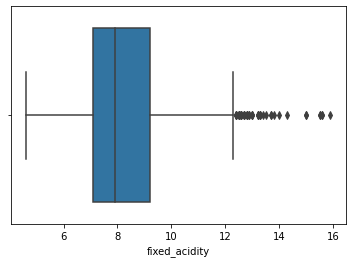

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


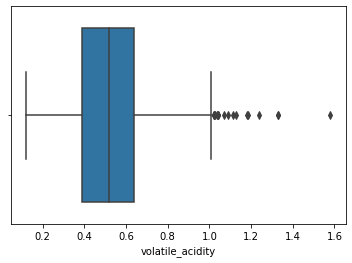

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


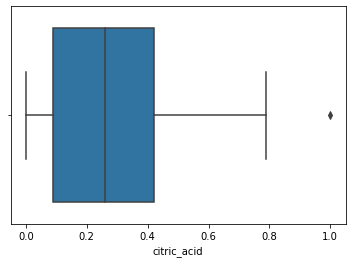

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


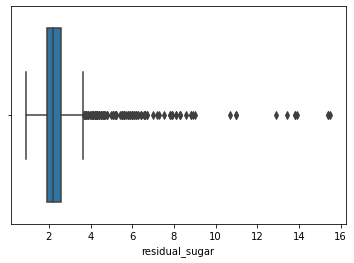

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


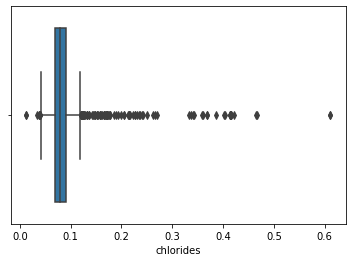

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


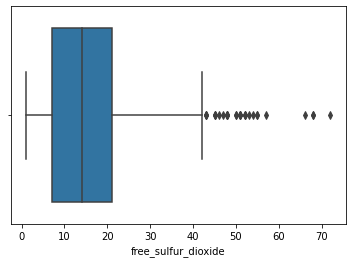

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


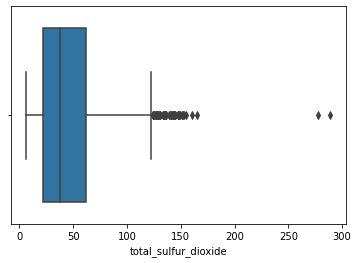

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


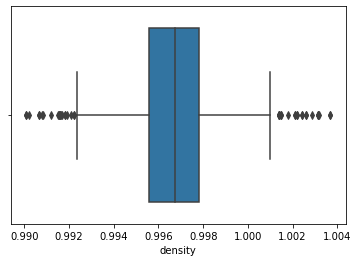

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


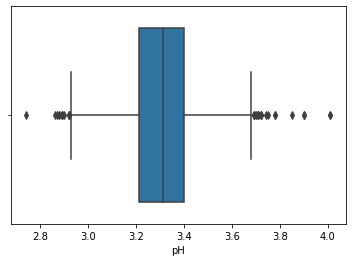

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


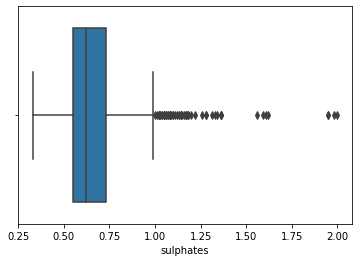

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


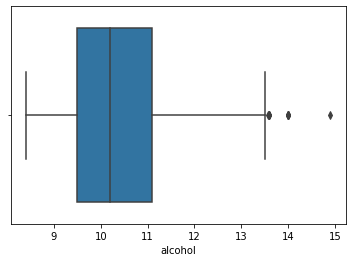

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


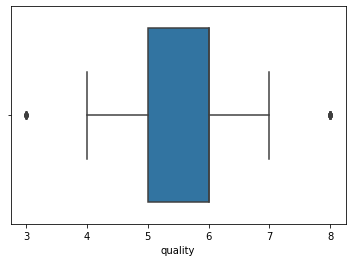

In [21]:
cols=list(df.columns)
for col in cols:
  sns.boxplot(df[col])
  plt.show()

In [22]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

df=df[~(df>(q3+1.5*iqr))]

In [23]:
df.isnull().sum()

fixed_acidity            49
volatile_acidity         19
citric_acid               1
residual_sugar          155
chlorides               103
free_sulfur_dioxide      30
total_sulfur_dioxide     55
density                  24
pH                       21
sulphates                59
alcohol                  13
quality                  18
dtype: int64

In [24]:
df=df.fillna(method='ffill')

In [25]:
#df=df.dropna()

In [26]:
df.shape

(1599, 12)

In [27]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [28]:
dfs= ss.fit_transform(df)
dfs=pd.DataFrame(dfs, columns=df.columns)

In [29]:
dfs.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,2.280620,-0.608389,1.338553,2.501033,1.755477,1.925244,2.035330,2.452992,-0.727809,2.607684,-1.167787,-0.783086
1,-1.033909,0.294175,-1.291562,-0.180787,2.413488,-0.993142,-0.990217,-0.071025,0.511193,0.448601,-0.873664,-0.783086


##Q1

In [30]:
cls=dfs.loc[:, ['fixed_acidity','volatile_acidity']]

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

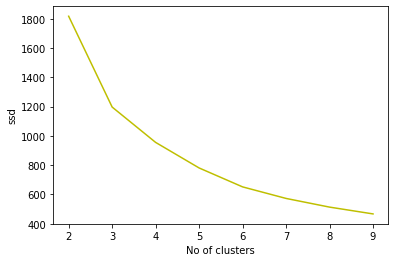

In [32]:
ssd=[]
score=[]
for k in range(2,10):
  kmeans=KMeans(n_clusters=k, random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  score.append(silhouette_score(cls,labels, random_state=4))
plt.plot(range(2,10), ssd,'y')
plt.xlabel('No of clusters')
plt.ylabel('ssd')
plt.show()

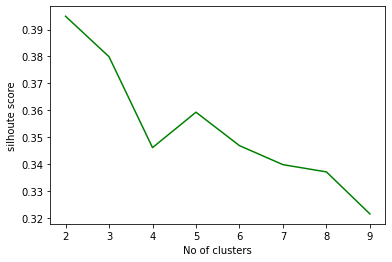

In [33]:
plt.plot(range(2,10), score,'g')
plt.xlabel('No of clusters')
plt.ylabel('silhoute score')
plt.show()

In [34]:
import plusmodules as pm

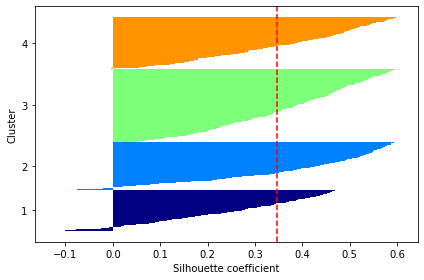

In [35]:
pm.svisualizer(cls,4)

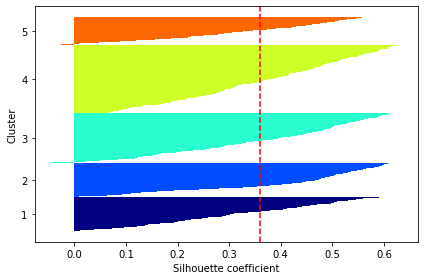

In [36]:
pm.svisualizer(cls,5)

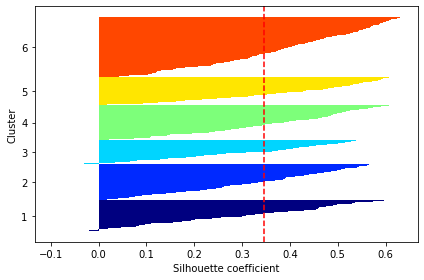

In [37]:
pm.svisualizer(cls,6)

elbow analysis shows possible elbows (not very distinct) at clusters 4,5 and 6.

Silhoutte score pplot showed higher value for 5 cluster solution, while comparing 4,5,6 no of clusters.

Hence we will chose 5 cluster solution as best.

We also checked distribution of Silhoutte coeffs.
This Distributions qualified all the requirements for 4,5,6.
hence this did not display any role in our decision 

##Q2

In [38]:
cls=dfs.loc[:, ['fixed_acidity','citric_acid']]

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

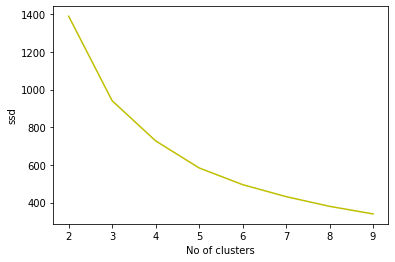

In [40]:
ssd=[]
score=[]
for k in range(2,10):
  kmeans=KMeans(n_clusters=k, random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  score.append(silhouette_score(cls,labels, random_state=4))
plt.plot(range(2,10), ssd,'y')
plt.xlabel('No of clusters')
plt.ylabel('ssd')
plt.show()

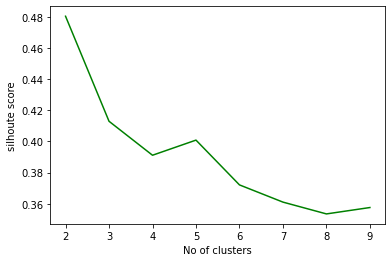

In [41]:
plt.plot(range(2,10), score,'g')
plt.xlabel('No of clusters')
plt.ylabel('silhoute score')
plt.show()

In [42]:
import plusmodules as pm

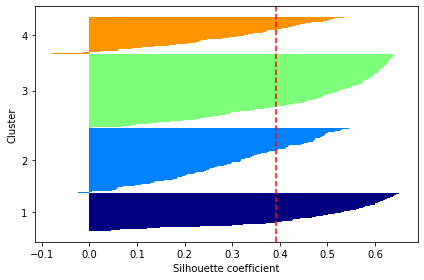

In [43]:
pm.svisualizer(cls,4)

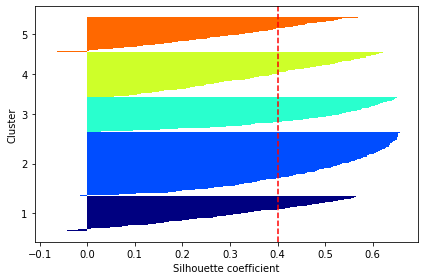

In [44]:
pm.svisualizer(cls,5)

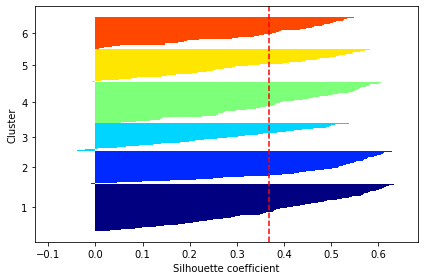

In [45]:
pm.svisualizer(cls,6)

elbow analysis shows possible elbows (not very distinct) at clusters 4,5 and 6.

Silhoutte score pplot showed higher value for 5 cluster solution, while comparing 4,5,6 no of clusters.

Hence we will chose 5 cluster solution as best.

We also checked distribution of Silhoutte coeffs.
This Distributions qualified all the requirements for 4,5,6.
hence this did not display any role in our decision 

##Q3

In [46]:
cls=dfs.loc[:, ['residual_sugar','sulphates']]

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

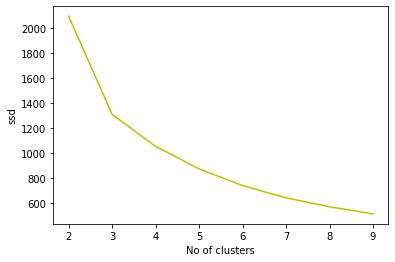

In [48]:
ssd=[]
score=[]
for k in range(2,10):
  kmeans=KMeans(n_clusters=k, random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  score.append(silhouette_score(cls,labels, random_state=4))
plt.plot(range(2,10), ssd,'y')
plt.xlabel('No of clusters')
plt.ylabel('ssd')
plt.show()

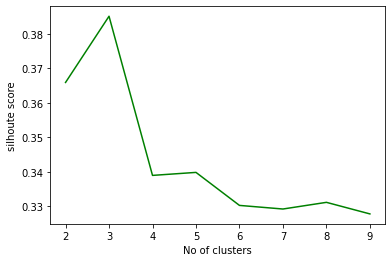

In [49]:
plt.plot(range(2,10), score,'g')
plt.xlabel('No of clusters')
plt.ylabel('silhoute score')
plt.show()

In [50]:
import plusmodules as pm

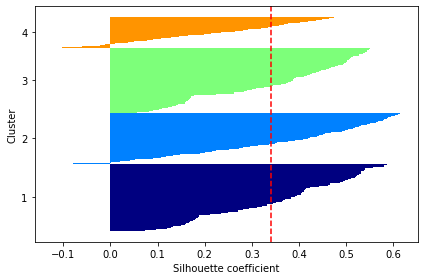

In [51]:
pm.svisualizer(cls,4)

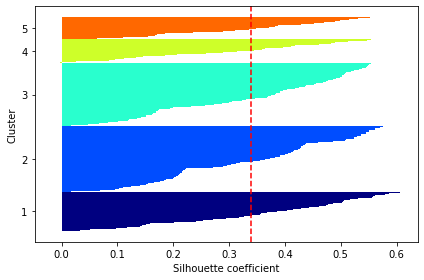

In [52]:
pm.svisualizer(cls,5)

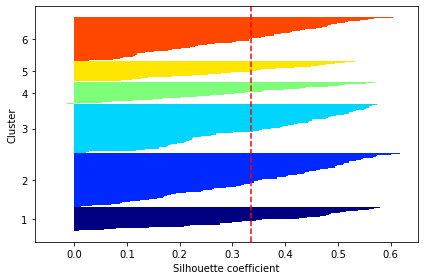

In [53]:
pm.svisualizer(cls,6)

elbow analysis shows possible elbows (not very distinct) at clusters 4,5 and 6.

Silhoutte score pplot showed higher value for 6 cluster solution, while comparing 4,5,6 no of clusters.

Hence we will chose 6 cluster solution as best.

We also checked distribution of Silhoutte coeffs.
This Distributions qualified all the requirements for 4,5,6.
hence this did not display any role in our decision 

# Q4

## Use feautes free.sulfur.dioxide and total.sulfur.dioxide

In [54]:
cls=dfs.loc[:, ['free_sulfur_dioxide',	'total_sulfur_dioxide'	]]

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

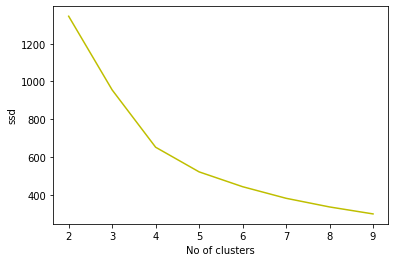

In [56]:
ssd=[]
score=[]
for k in range(2,10):
  kmeans=KMeans(n_clusters=k, random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  score.append(silhouette_score(cls,labels, random_state=4))
plt.plot(range(2,10), ssd,'y')
plt.xlabel('No of clusters')
plt.ylabel('ssd')
plt.show()

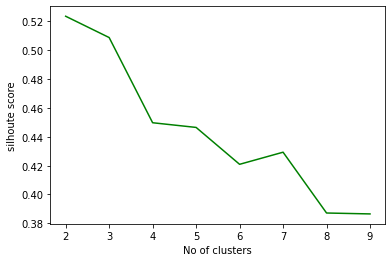

In [57]:
plt.plot(range(2,10), score,'g')
plt.xlabel('No of clusters')
plt.ylabel('silhoute score')
plt.show()

In [58]:
import plusmodules as pm

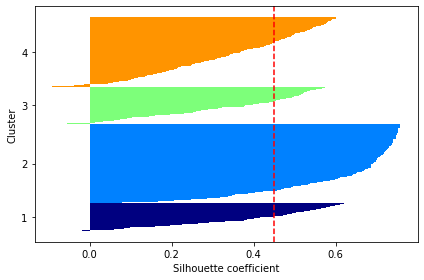

In [59]:
pm.svisualizer(cls,4)

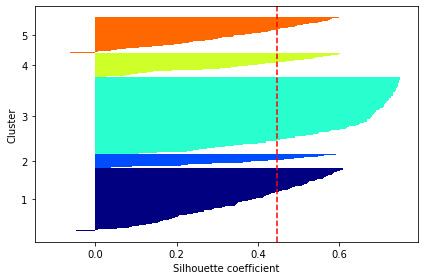

In [60]:
pm.svisualizer(cls,5)

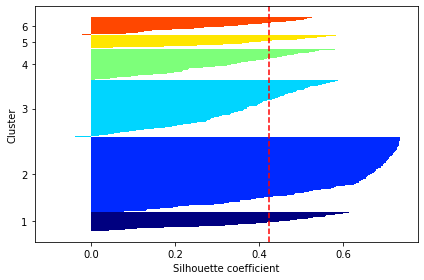

In [61]:
pm.svisualizer(cls,6)

# Q5

In [ ]:
#Use feautes density and pH

In [63]:
cls=dfs.loc[:, ['density','pH'	]]

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

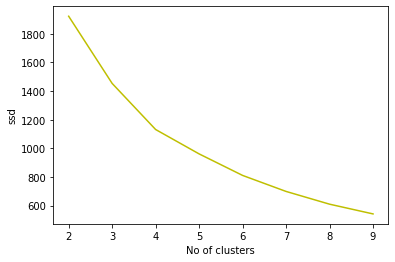

In [65]:
ssd=[]
score=[]
for k in range(2,10):
  kmeans=KMeans(n_clusters=k, random_state=4)
  kmeans.fit(cls)
  ssd.append(kmeans.inertia_)
  labels=kmeans.labels_
  score.append(silhouette_score(cls,labels, random_state=4))
plt.plot(range(2,10), ssd,'y')
plt.xlabel('No of clusters')
plt.ylabel('ssd')
plt.show()

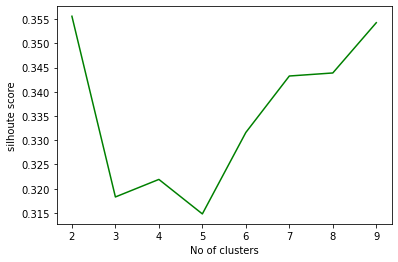

In [66]:
plt.plot(range(2,10), score,'g')
plt.xlabel('No of clusters')
plt.ylabel('silhoute score')
plt.show()

In [67]:
import plusmodules as pm

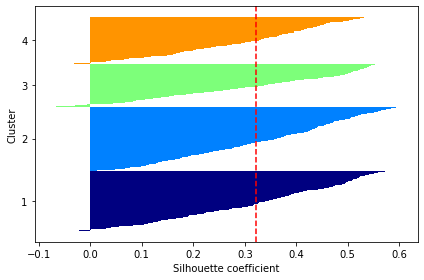

In [68]:
pm.svisualizer(cls,4)

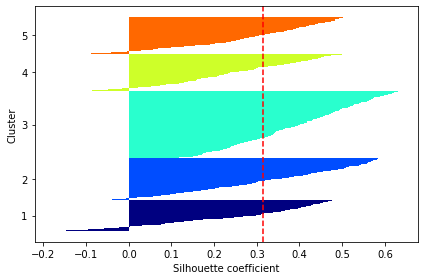

In [69]:
pm.svisualizer(cls,5)

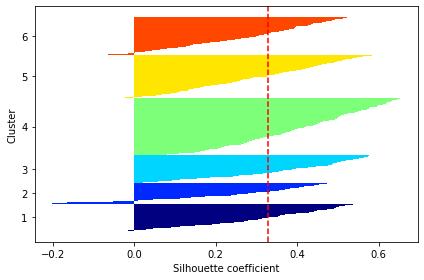

In [70]:
pm.svisualizer(cls,6)